In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('../data/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)
df

,Class,sodium,extract,alcohol,water,glycerin,glycol,acid,dimethicone,fragrance,...,tomato,pyrus,tromethamine,hedera,helix,fillers,proprietary,microcapsules,https,pinterest
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
## Implementing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df.drop('Class', axis=1))
x_pca = pca.transform(df.drop('Class', axis=1))
x_pca.shape

(1100, 2)

Text(0, 0.5, 'Second Principal Component')

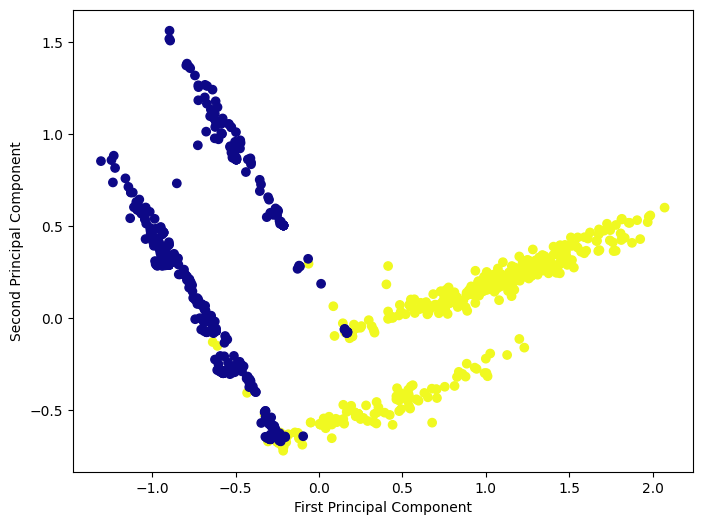

In [6]:

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['Class'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')



In [8]:
## Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x_pca, df['Class'], test_size=0.3, random_state=101)

In [9]:
## Training and Predicting
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)



In [10]:
## Evaluation
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[132  28]
 [  4 166]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       160
           1       0.86      0.98      0.91       170

    accuracy                           0.90       330
   macro avg       0.91      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330



C:\Users\HP\AppData\Local\Temp\ipykernel_14688\703292733.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


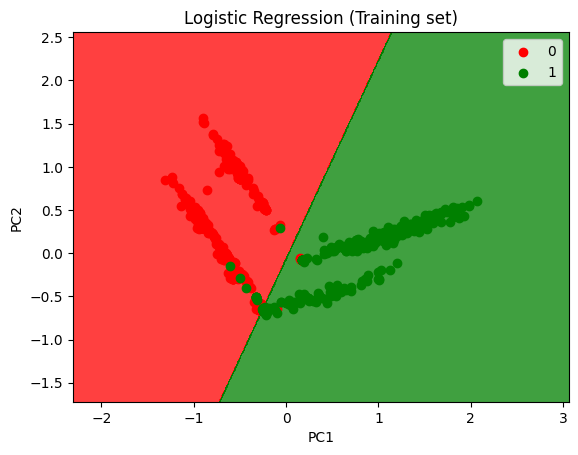

In [11]:

## Plotting the decision boundary
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()